<a href="https://colab.research.google.com/github/GuillermoArduino/MLTrabajos-Practica/blob/main/Copia_de_Unidad2_5_plot_iris_dtc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Plot the decision surface of a decision tree on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See `decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

We also show the tree structure of a model built on all of the features.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Coeficiente de Spearman
                   fecha_ingreso  fin_vigencia_plan  cnt_readmisiones  \
fecha_ingreso           1.000000           0.831173         -0.219435   
fin_vigencia_plan       0.831173           1.000000         -0.277779   
cnt_readmisiones       -0.219435          -0.277779          1.000000   
regEncoded             -0.784865          -0.714947          0.074077   

                   regEncoded  
fecha_ingreso       -0.784865  
fin_vigencia_plan   -0.714947  
cnt_readmisiones     0.074077  
regEncoded           1.000000  
 Max Depth  Average Accuracy
         1           0.89445
         2           0.89445
         3           0.89655
         4           0.89655
88.71
(4811, 7)
                 regEncoded            
                       mean count   sum
cnt_readmisiones                       
0                  1.563215  3583  560

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


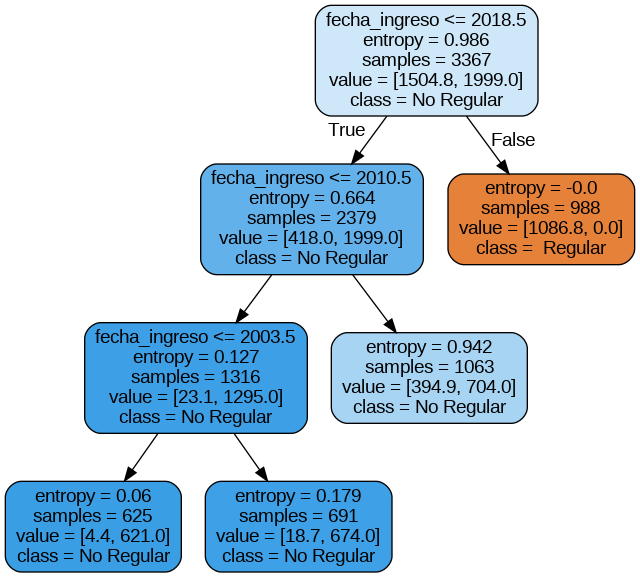

<Figure size 864x864 with 0 Axes>

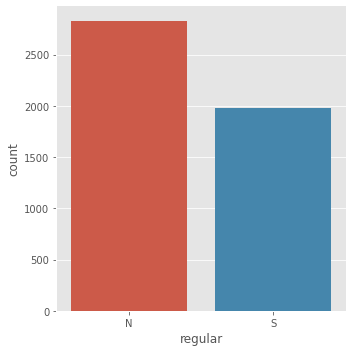

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/gdrive')
alumnos=pd.read_excel('gdrive/My Drive/archivo.xlsx')




#Mapeo de readmisiones

#alumnos.loc[alumnos['cnt_readmisiones'] == 0 , 'readEncoded']=1
#alumnos.loc[alumnos['cnt_readmisiones'] == 1 , 'readEncoded']=2
#alumnos.loc[alumnos['cnt_readmisiones'] == 2 , 'readEncoded']=3
#alumnos.loc[(alumnos['cnt_readmisiones'] >=3), 'readEncoded'] = 4

#Mapeo de regularidad
alumnos['regEncoded'] = alumnos['regular'].map( {'N': 2,
                                          'S': 1
                                                }
                                       ).astype(int)
#Creacion del encoded

drop_elements = ['plan','regular','nombre']
alumnos_encoded = alumnos.drop(drop_elements, axis = 1)
alumnos_encoded.describe()
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))

#plt.title('Correlación de Pearson de las características', y=1.05, size=15)
#sb.heatmap(alumnos_encoded.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


print("Coeficiente de Spearman")
print(alumnos_encoded.corr('spearman') )

cv = KFold(n_splits=1000) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(alumnos_encoded))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=200,
                                             min_samples_leaf=500,
                                             max_depth = depth,

                                             class_weight={1:1.4})
    for train_fold, valid_fold in cv.split(alumnos_encoded):
        f_train = alumnos_encoded.loc[train_fold]
        f_valid = alumnos_encoded.loc[valid_fold]


        model = tree_model.fit(X = f_train.drop(['regEncoded'], axis=1),
                                y = f_train["regEncoded"])
        valid_acc = model.score(X = f_valid.drop(['regEncoded'], axis=1),
                                y = f_valid["regEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)


# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a readmision o no
X = alumnos_encoded[['fecha_ingreso','fin_vigencia_plan', 'cnt_readmisiones']]
y = alumnos_encoded['regEncoded']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.70, test_size=0.30, random_state=42)
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=200,
                                            min_samples_leaf=500,
                                            max_depth = 4,
                                            class_weight={1:1.4})
decision_tree.fit(X_train, y_train)


# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names =list(alumnos_encoded.drop(['cnt_readmisiones'], axis=1)),
                              class_names = [' Regular','No Regular'],
                              rounded = True,
                              filled= True )

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)
print(alumnos.shape)

print(sb.catplot('regular',data=alumnos,kind="count"))
print(alumnos_encoded[['cnt_readmisiones', 'regEncoded']].groupby(['cnt_readmisiones'], as_index=False).agg(['mean', 'count', 'sum']))



# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = decision_tree.predict(X_train)
# Predecimos sobre nuestro set de test
y_test_pred = decision_tree.predict(X_test)
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
 # Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")




In [ ]:
X.shape